# Regularized Linear Regression and Bias/Variance

In [240]:
## Import all the things
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from scipy.io import loadmat
import scipy.optimize as opt
from scipy.optimize import minimize
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [241]:
f = loadmat('ex5data1.mat')

# Train
X = f['X']
y = f['y']
    
# Cross Validation
Xval = f['Xval']
yval = f['yval']

# Test
Xtest = f['Xtest']
ytest = f['ytest']

## Grab m (# number of samples) and n (# of features)
m, n = X.shape
m, n

(12, 1)

In [242]:
X, y

(array([[-15.93675813],
        [-29.15297922],
        [ 36.18954863],
        [ 37.49218733],
        [-48.05882945],
        [ -8.94145794],
        [ 15.30779289],
        [-34.70626581],
        [  1.38915437],
        [-44.38375985],
        [  7.01350208],
        [ 22.76274892]]), array([[ 2.13431051],
        [ 1.17325668],
        [34.35910918],
        [36.83795516],
        [ 2.80896507],
        [ 2.12107248],
        [14.71026831],
        [ 2.61418439],
        [ 3.74017167],
        [ 3.73169131],
        [ 7.62765885],
        [22.7524283 ]]))

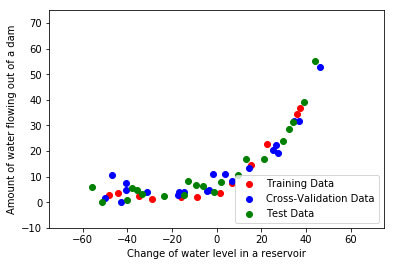

In [243]:
plt.scatter(X, y, c='r', label='Training Data')
plt.scatter(Xval, yval, c='b', label='Cross-Validation Data')
plt.scatter(Xtest, ytest, c='g', label='Test Data')

plt.xlim(-75,75)
plt.ylim(-10,75)
plt.xlabel('Change of water level in a reservoir')
plt.ylabel('Amount of water flowing out of a dam');

plt.legend(loc=4);

('Coefficients: \n', array([[0.36777923]]))
Mean squared error: 65.01
Variance score: 0.68


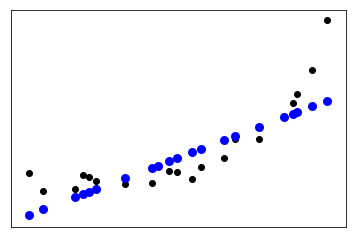

In [244]:
# LINEAR REGRESSION
# http://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html
linear_regression = LinearRegression(normalize=True)
clf = linear_regression.fit(X, y)
ytest_prime = clf.predict(Xtest)

# The coefficients
print('Coefficients: \n', clf.coef_)
# The mean squared error 
# sum of squared errors divided by number of samples
print("Mean squared error: %.2f"
      % mean_squared_error(ytest, ytest_prime))

# Explained variance score: 1 is perfect prediction
# Proportion of the variance in the dependent variable that is predictable from the independent variable(s)
print('Variance score: %.2f' % r2_score(ytest, ytest_prime))

# Plot outputs
plt.scatter(Xtest, ytest,  color='black')
plt.scatter(Xtest, ytest_prime, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [245]:
# LOGISTIC REGRESSION
# http://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html
# ONLY FOR CLASSIFICATION BINARY

# https://stackoverflow.com/questions/41925157/logisticregression-unknown-label-type-continuous-using-sklearn-in-python


In [246]:
from sklearn.linear_model import RidgeCV
reg = RidgeCV(alphas=[0.1, 1.0, 10.0, 100])
clf = reg.fit(X, y)
clf.alpha_ 

100.0

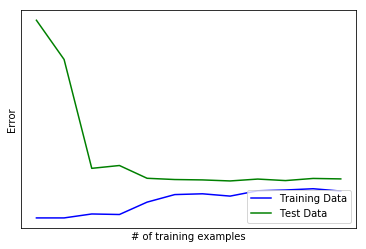

In [247]:
# Plot training examples vs error

r2_scores = []
mean_squared_errors = []
mean_squard_errors_train = []
for i in range(12):
    linear_regression = LinearRegression(normalize=True)
    clf = linear_regression.fit(X[0:i+1], y[0:i+1])
    ytest_prime = clf.predict(Xtest)
    r2_scores.append(r2_score(ytest, ytest_prime))
    mean_squared_errors.append(mean_squared_error(ytest, ytest_prime))
    yprime = clf.predict(X[0:i+1])
    mean_squard_errors_train.append(mean_squared_error(y[0:i+1], yprime[0:i+1]))


# Plot outputs
plt.plot([i for i in range(12)], mean_squard_errors_train,  color='blue', label='Training Data')
plt.plot([i for i in range(12)], mean_squared_errors, color='green', label='Test Data')

plt.xticks(())
plt.yticks(())

plt.xlabel('# of training examples')
plt.ylabel('Error');

plt.legend(loc=4);
plt.show()

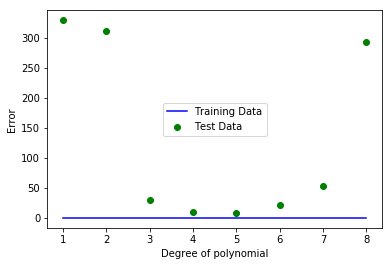

In [269]:
# Plot degree of polynomial vs error
from sklearn.preprocessing import PolynomialFeatures

mean_squared_errors = []
mean_squard_errors_train = []
for i in range(1, 9):
    poly = PolynomialFeatures(degree=i)
    Xtransform = poly.fit_transform(X.reshape(-1,1))
    Xtesttransform = poly.fit_transform(Xtest.reshape(-1,1))
    
    linear_regression = LinearRegression(normalize=True)
    clf = linear_regression.fit(Xtransform[:][:i], y[0:i])
    ytest_prime = clf.predict(Xtesttransform)
    mean_squared_errors.append(mean_squared_error(ytest, ytest_prime))
    
    yprime = clf.predict(Xtransform[:][:i])
    mean_squard_errors_train.append(mean_squared_error(y[0:i], yprime[0:i]))
    
# Plot outputs
plt.scatter([i for i in range(1, 9)], mean_squared_errors, color='green', label='Test Data')
plt.plot([i for i in range(1, 9)], mean_squard_errors_train,  color='blue', label='Training Data')

plt.xlabel('Degree of polynomial')
plt.ylabel('Error');

plt.legend(loc=10);
plt.show()